# 1. 建立數據集¶
- 兩個二次分布的數據，不過他們的均值都不一樣

In [2]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

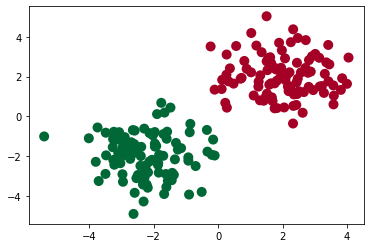

In [5]:
# Fake data
n_data = torch.ones(100, 2)       # 數據的基本型態
x0 = torch.normal(2 * n_data, 1)  # 類型 0 : x data (tensor), shape=(100, 2)
y0 = torch.zeros(100)             # 類型 0 : y data (tensor), shape=(100, )
x1 = torch.normal(-2 * n_data, 1) # 類型 1 : x data (tensor), shape=(100, 1)
y1 = torch.ones(100)              # 類型 1 : y data (tensor), shape=(100, )

# 注意 x, y 數據的數據形式是一定要像下面一樣 (torch.cat 是在合併數據)
x = torch.cat((x0, x1), 0).type(torch.FloatTensor)   # As data # FloatTensor = 32-bit floating
y = torch.cat((y0, y1), ).type(torch.LongTensor)     # As Label # LongTensor = 64-bit integer

x, y = Variable (x), Variable (y)

# 散佈圖
plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=y.data.numpy(), s=100, lw=0, cmap='RdYlGn')
plt.show()

# 2. 建立神經網路

In [6]:
class Net (torch.nn.Module):  # 繼承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # 繼承 __init__ 功能
        # Define every layer
        self.hidden = torch.nn.Linear (n_feature, n_hidden) # output is linear in the hidden layer
        self.predict = torch.nn.Linear (n_hidden, n_output) # output is linear in the output layer
              
    def forward(self, x): # 這也是 Module 中的 forward 功能
        # 正向傳播輸入值, 神經網路分析出輸出值
        x = F.relu(self.hidden(x))  # Activation function (隱藏層的線性值)
        x = self.predict(x)         # 不用 Activation function，不希望數值被截斷
        return x
    
# 2個輸出 : 1個為1，其他為0
net = Net(n_feature = 2, n_hidden = 10, n_output = 2)
print (net)  # net 的結構

Net(
  (hidden): Linear(in_features=2, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=2, bias=True)
)


# 3. 訓練網路

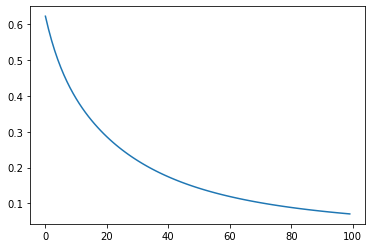

In [7]:
# optimizer 是訓練的工具
optimizer = torch.optim.SGD (net.parameters(), lr = 0.02) # 傳入 net 的所有參數
# 算誤差的時候, 注意真實值!不是! one-hot 形式的, 而是1D Tensor, (batch,)
# 但是預測值是 2D tensor (batch, n_classes)
loss_func = torch.nn.CrossEntropyLoss() # 分類使用 CrossEntropy

LOSS = []
epochs = 100
for t in range (epochs):
    out = net (x)   # 餵给 net 訓練數據 x, 輸出預測值
    loss = loss_func (out, y)  # 計算兩者的誤差
    LOSS.append (loss.item())         # item()用在只包含一個元素的 tensor 中提取值，否則使用.tolist()
    
    optimizer.zero_grad()  # 清空上一步的殘餘更新參數值
    loss.backward()        # 誤差反向傳播, 計算參數更新值
    optimizer.step()       # 將參數更新值施加到 net 的 parameters 上
    
plt.plot (LOSS, label = "Training Loss")
plt.show ()

### ---可視化訓練過程---

<ipython-input-14-992b825c4f64>:19: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  prediction = torch.max(F.softmax(out),1)[1] # torch.max [1] : return index, [0] : value


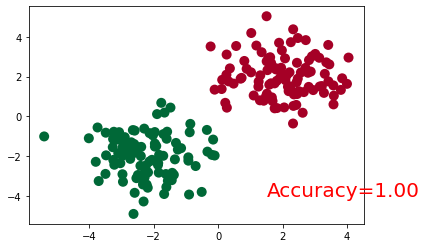

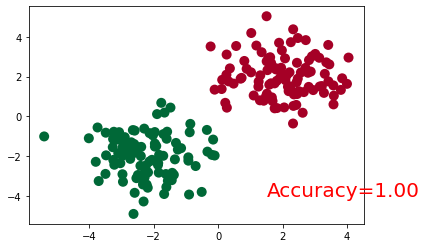

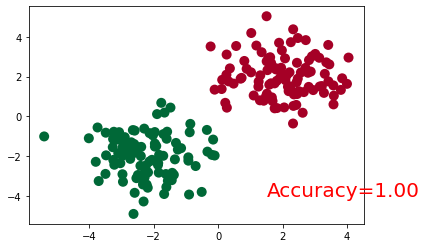

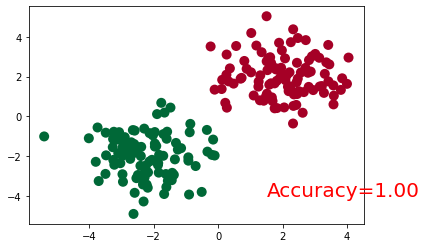

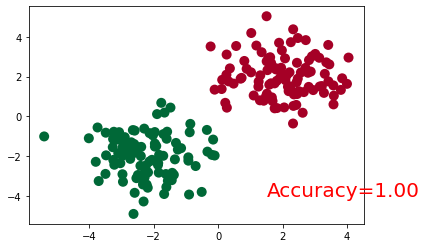

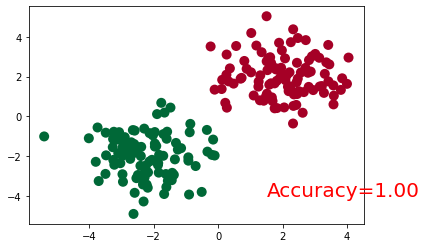

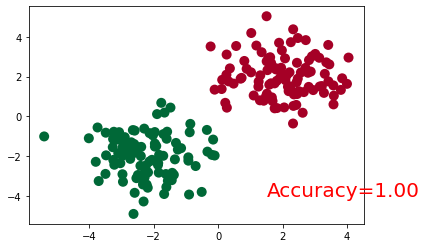

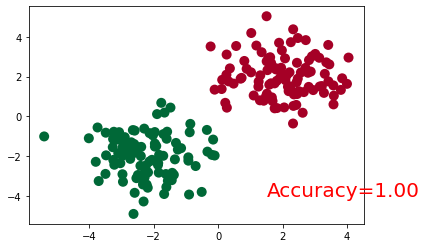

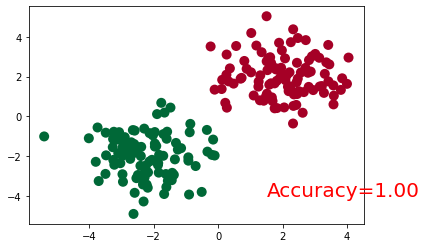

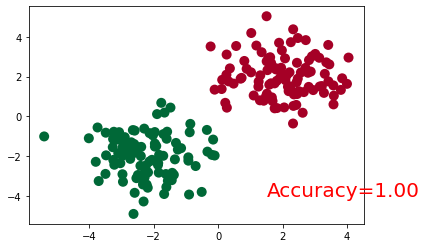

In [14]:
plt.ion()   # 及時畫圖
plt.show()

optimizer = torch.optim.SGD (net.parameters(), lr = 0.02) 
loss_func = torch.nn.CrossEntropyLoss() 

epochs = 100
for t in range (epochs):
    out = net (x)             # [0.1, 0.2, 0.7]   
    loss = loss_func (out, y)  
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step() 

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        # 過了一道 softmax 後的最大概率才是預測值
        prediction = torch.max(F.softmax(out),1)[1] # torch.max [1] : return index, [0] : value
        pred_y = prediction.data.numpy().squeeze() # 即把shape中為 1 的維度去掉
        target_y = y.data.numpy()
        plt.scatter(x.data.numpy()[:, 0], x.data.numpy()[:, 1], c=pred_y, s=100, lw=0, cmap='RdYlGn')
        accuracy = sum(pred_y == target_y) / 200  # 預測中有多少和真實值一樣
        plt.text(1.5, -4, 'Accuracy=%.2f' % accuracy, fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()  # 停止畫圖
plt.show()

# Reference

https://mofanpy.com/tutorials/machine-learning/torch/classification